In [ ]:
import rclpy
import time
from sim_interface import SimInterface as Sim
import threading

from rclpy.node import Node
from rclpy.executors import MultiThreadedExecutor
from std_msgs.msg import String
import numpy as np
%load_ext autoreload
%autoreload 3
%matplotlib qt

In [ ]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians

In [ ]:
script1 = \
[[0, -684.42, 661.72, 96.48, 0.056,  -0.054,  0.725,  0.685],
[1, -682.73, 661.59, 96.26, 0.048,  -0.044,  0.730,  0.680],
[2, -677.48, 661.25, 95.53, 0.050,  -0.049,  0.725,  0.685],
[3, -667.96, 660.91, 94.20, 0.053,  -0.051,  0.715,  0.695],
[4, -659.88, 660.68, 93.07, 0.055,  -0.054,  0.715,  0.695],
[5, -651.68, 660.48, 91.98, 0.043,  -0.043,  0.714,  0.698],
[6, -643.40, 660.30, 91.70, 0.002,  -0.004,  0.715,  0.699],
[7, -635.37, 660.03, 91.69, 0.005,  0.001,  0.721,  0.693],
[8, -627.59, 659.39, 91.71, 0.005,  -0.003,  0.748,  0.664],
[9, -619.71, 657.63, 91.71, 0.007,  -0.003,  0.803,  0.596],
[10, -611.96, 654.07, 91.69, 0.008,  -0.007,  0.865,  0.501],
[11, -604.99, 648.85, 91.56, 0.008,  -0.014,  0.907,  0.421],
[12, -598.47, 642.65, 91.38, 0.008,  -0.017,  0.923,  0.384],
[13, -592.82, 636.87, 91.22, 0.006,  -0.015,  0.927,  0.376],
[14, -587.41, 631.29, 91.05, 0.006,  -0.015,  0.927,  0.375],
[15, -581.53, 625.22, 90.91, 0.005,  -0.013,  0.927,  0.375],
[16, -575.39, 618.87, 90.73, 0.006,  -0.015,  0.927,  0.375],
[17, -569.58, 612.88, 90.55, 0.002,  -0.017,  0.927,  0.375],
[18, -563.98, 607.11, 90.41, 0.006,  -0.011,  0.927,  0.376],
[19, -558.50, 601.47, 90.25, 0.006,  -0.014,  0.927,  0.376],
[20, -553.04, 595.85, 90.12, 0.008,  -0.010,  0.927,  0.376],
[21, -547.53, 590.17, 90.11, 0.000,  -0.004,  0.927,  0.376],
[22, -541.73, 584.21, 90.13, 0.003,  -0.006,  0.927,  0.376],
[23, -535.86, 578.16, 90.18, -0.004,  0.008,  0.926,  0.376],
[24, -529.90, 572.07, 90.73, -0.013,  0.031,  0.925,  0.378],
[25, -524.38, 566.51, 91.34, -0.012,  0.031,  0.924,  0.381],
[26, -519.50, 561.64, 91.87, -0.014,  0.030,  0.923,  0.384],
[27, -515.04, 557.22, 92.35, -0.014,  0.040,  0.922,  0.384],
[28, -509.26, 551.49, 92.99, -0.014,  0.035,  0.922,  0.384],
[29, -503.05, 545.33, 93.66, -0.013,  0.032,  0.922,  0.385],
[30, -496.79, 539.14, 94.33, -0.013,  0.029,  0.922,  0.385],
[31, -490.57, 532.96, 95.01, -0.012,  0.030,  0.923,  0.384],
[32, -484.86, 527.30, 95.63, -0.014,  0.029,  0.923,  0.384],
[33, -479.54, 522.04, 96.20, -0.011,  0.030,  0.923,  0.385],
[34, -477.52, 520.04, 96.41, -0.010,  0.024,  0.923,  0.384],
[35, -477.48, 520.00, 96.43, -0.011,  0.026,  0.923,  0.384],
[36, -477.50, 520.01, 96.43, -0.010,  0.024,  0.923,  0.384],
[37, -477.50, 520.01, 96.42, -0.011,  0.025,  0.923,  0.384],
[38, -477.50, 520.01, 96.42, -0.011,  0.025,  0.923,  0.384],
[39, -477.54, 520.05, 96.42, -0.011,  0.026,  0.923,  0.384],
[40, -477.35, 519.86, 96.43, -0.011,  0.027,  0.923,  0.384],
[41, -477.36, 519.87, 96.43, -0.011,  0.027,  0.923,  0.384],
[42, -477.36, 519.87, 96.43, -0.011,  0.027,  0.923,  0.384],
[43, -477.49, 520.00, 96.43, -0.011,  0.026,  0.923,  0.384],
[44, -477.49, 520.00, 96.42, -0.012,  0.027,  0.923,  0.384],
[45, -477.49, 520.00, 96.42, -0.012,  0.027,  0.923,  0.384],
[46, -477.49, 520.00, 96.42, -0.012,  0.027,  0.923,  0.384],
[47, -477.55, 520.06, 96.42, -0.012,  0.027,  0.923,  0.384],
[48, -477.42, 519.94, 96.41, -0.011,  0.028,  0.923,  0.384],
[49, -477.42, 519.93, 96.42, -0.012,  0.029,  0.923,  0.384],
[50, -477.42, 519.93, 96.42, -0.012,  0.029,  0.923,  0.384],
[51, -477.50, 520.01, 96.41, -0.010,  0.024,  0.923,  0.385],
[52, -477.50, 520.01, 96.42, -0.011,  0.026,  0.923,  0.385],
[53, -477.50, 520.01, 96.42, -0.011,  0.026,  0.923,  0.385],
[54, -477.50, 520.01, 96.42, -0.011,  0.026,  0.923,  0.385],
[55, -477.50, 520.01, 96.42, -0.011,  0.027,  0.923,  0.384],
[56, -477.55, 520.06, 96.42, -0.012,  0.029,  0.923,  0.384],
[57, -477.34, 519.86, 96.43, -0.012,  0.026,  0.923,  0.384],
[58, -477.35, 519.87, 96.43, -0.012,  0.026,  0.923,  0.384],
[59, -477.35, 519.86, 96.44, -0.012,  0.026,  0.923,  0.384]]


In [ ]:

from math import atan2
import numpy as np

def wrap_angle(angles):
    return (angles + np.pi) % (2 * np.pi) - np.pi

arr = []
for s in script1:
    arr.append([s[0]*1, s[1], s[2], s[3], 0])

for i in range(len(script1)):
    x = euler_from_quaternion(script1[i][4], script1[i][5], script1[i][6], script1[i][7])
    arr[i][4] = wrap_angle(-x[2]) + np.pi/2
brr = []
for node in arr:
    brr.append({'x':node[1], 'y':node[2], 'z':node[3], 't':node[0], 'theta':node[4]})
np.save("dummy_script_21_02_23.npy", brr)
var = np.load("dummy_script_21_02_23.npy", allow_pickle=True)

In [ ]:
var

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Patch3DCollection
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
box = [[-582.9910072670466, 705.9806582469514, -1.5], [-553.03064603992, 704.4389854087347, -1.5], [-553.03064603992, 704.4389854087347, -1.5], [-551.4889732017033, 734.3993466358611, -1.5], [-551.4889732017033, 734.3993466358611, -1.5], [-581.4493344288298, 735.9410194740778, -1.5], [-581.4493344288298, 735.9410194740778, -1.5], [-582.9910072670466, 705.9806582469514, -1.5], [-582.9910072670466, 705.9806582469514, 1.5], [-553.03064603992, 704.4389854087347, 1.5], [-553.03064603992, 704.4389854087347, 1.5], [-551.4889732017033, 734.3993466358611, 1.5], [-551.4889732017033, 734.3993466358611, 1.5], [-581.4493344288298, 735.9410194740778, 
1.5], [-581.4493344288298, 735.9410194740778, 1.5], [-582.9910072670466, 705.9806582469514, 1.5], [-582.9910072670466, 705.9806582469514, -1.5], [-582.9910072670466, 705.9806582469514, 1.5], [-553.03064603992, 704.4389854087347, -1.5], [-553.03064603992, 704.4389854087347, 1.5], [-551.4889732017033, 734.3993466358611, -1.5], [-551.4889732017033, 734.3993466358611, 1.5], [-581.4493344288298, 735.9410194740778, -1.5], [-581.4493344288298, 735.9410194740778, 1.5], [-582.9910072670466, 705.9806582469514, -1.5]]
print(np.shape(np.expand_dims(box,axis=0)))
ax.add_collection3d(Poly3DCollection(np.expand_dims(box,axis=0)))
ax.set_xlim([-600, -550])
ax.set_ylim([690, 750])
ax.set_zlim([-3, 3])

plt.show()

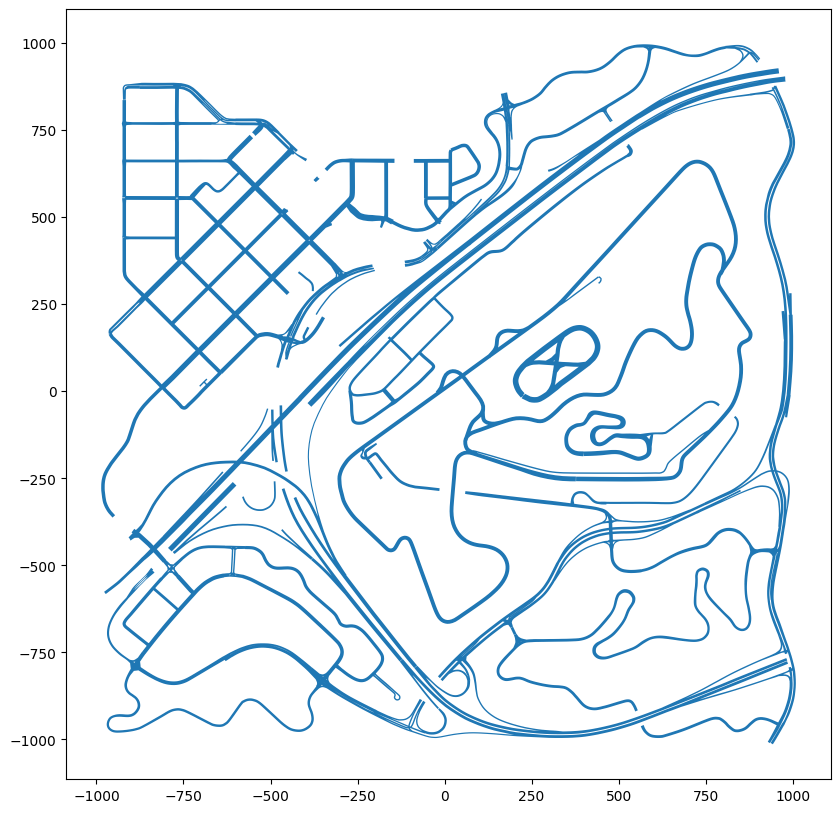

In [3]:
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
from shapely.validation import make_valid
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

roads=np.load("roads.npy", allow_pickle=True)
j = 0
for road in roads:
    j += len(road)
points = np.zeros((int(2*j), 2), dtype=np.float32)
k = 0
polys = []
for i in range(len(roads)):
    poly = []
    tmp = k
    for j in range(len(roads[i])):
        points[k][0] = np.around(roads[i][j]["right"][0],decimals=1)
        points[k][1] = np.around(roads[i][j]["right"][1],decimals=1)
        poly.append([points[k][0], points[k][1]])
        k += 1
    tmp = []
    for j in range(len(roads[i])):
        points[k][0] = np.around(roads[i][j]["left"][0],decimals=1)
        points[k][1] = np.around(roads[i][j]["left"][1],decimals=1)
        tmp.append([points[k][0], points[k][1]])
        k += 1
    poly += tmp[::-1]
    polys.append(make_valid(Polygon(poly)))

boundary = gpd.GeoSeries(unary_union(polys))
# frame = Polygon([(0, 100), (100, 100), (100, 0), (0,0)])
# boundary = boundary.clip_by_rect(xmin=-680, ymin=529, xmax=-360, ymax=847)
boundary.plot()

In [ ]:
arr = np.array(r)
# np.save("roads.npy",arr)

In [ ]:
from shapely.geometry import Polygon, LineString, Point
s1 = gpd.GeoSeries(
    [
        Polygon([(1, 1), (2, 1), (2, 2), (1,2)])
    ]
)
boundary.intersects(s1)

In [ ]:
a = [[1,2,3],[5,5,5],[6,6,6]]
b = [-1,-2,-3]

for s in zip(a,b):
    print(s[0])
    print(s[1])

In [ ]:
import time
import plotly.graph_objects as go
import numpy as np

# initialize and display plot
fig = go.FigureWidget()
fig.add_scatter(y=np.random.randint(0,10, 5), fill='tozeroy')
display(fig)

# modify plot using new data
for i in range(10):
    time.sleep(0.5)
    fig.data[0].y = np.random.randint(0,10, 5)